# ICS 434: DATA SCIENCE FUNDAMENTALS

## Time Series Analysis

---

## Announcements

* Homework assignment #4
   * Due: **Friday, April 14, 11:59 PM**
   * Refer to the `Homework submission guidelines` announcement in Laulima for preparing and submitting your homework.

## Slide Credits

Most of these slides were taken from Mahdi Belcaid.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

from IPython.display import Image
from scipy.optimize import curve_fit
import matplotlib.ticker as plticker

np.set_printoptions(suppress=True)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

### Introduction to Time Series Analysis

* We will cover a few essential concepts for analyzing or modeling time series data
* This is meant to be an introductory overview
  * Time series are complex and warrant an entire course
* We will only consider univariate time series

### Time Series Data 

* Time series data is different from data we used so far with regards to two aspects 

  1. Data points are not independent of each other
    * Observation at time $t$ is dependent on observation at time $t-1$
    * Therefore, ordering of the data matters
    
  2. Data does not come from the same distribution
    * Data may come from different distributions (typically same class of distributions but different parameters)


### What Are Time Series?

- Time series are data where the variation of some quantity is followed over time

- Examples: 

  - The number of cars that pass an intersection over time
  - The number of travelers arriving at HNL over time
  - Temperature fluctuations over time
  

### Time Series Data 

* Time series data is different from data we used so far with regards to two aspects 

  1. Data points are not independent of each other
    * Observation at time $t$ is dependent on observation at time $t-1$
    * Therefore, ordering of the data matters
    
  2. Data are not necessarily identically distributed
    * Data may come from different distributions (typically same class of distributions but different parameters)


### Some of the Goal of Time Series Analysis or Modeling

* Find the model that best describes the data and use that model to identify trends in the data
  * Forecast future values
  * Identify variability in forecasts 
  
* So far, we were principally interested in understanding the models
  * Understanding the logic of the generative process
  * Uncovering the model's parameters
  * Principally test hypotheses
      * Likelihood of certain data
      * Comparing datasets
      * etc.
      

### What Are Time Series?

- Time series are data where the variation of some quantity is followed over time

- Examples: 

  - The number of cars that pass an intersection over time
  - The number of travelers arriving at HNL over time
  - Temperature fluctuations over time
  

### Class of Time Series  Models Covered Here

* We will cover two basic types of models

  * Regression models that use the time component in a model to infer $y$

  * Models that use past values and past prediction errors to model actual values 
    * Bread and butter of econometrics, finance, atmospheric sciences, etc.
  
* Here, again, we are using a parametric and non-parametric approach to looking at time series data
 

### Types of Time Series

* Random walks: predominantly noise (ex. stock returns) 
  * No discernible patterns
  * Any observed patterns are due to noise
   
$\hspace{2in} v_t= v_{t-1} + \epsilon_t$, $\hspace{0.2in}$ where $\epsilon ~\sim \mathcal{N}(\mu, \sigma)$ 

* Full or partial combination  of trend, seasonality, and noise (ex. $\mbox{CO}_2$ levels in the atmosphere)

$\hspace{2in} v_t = f(t) + s(t) + \epsilon_t$

$\hspace{0.6in}$ where `f` is a trend function and `s` is a seasonality function


In [3]:
### Types of Time series: A Random Walk

v = np.zeros(1000)
mu = 0,
sigma = 1

for t in range(1000):
    v[t] = v[t-1] + np.random.normal(mu, sigma)

v[0:10]

array([-0.66505473,  0.328303  ,  0.05015944,  1.45185946,  1.03053382,
        1.49314261,  1.78676685,  1.71552837,  1.40790103,  2.28232422])

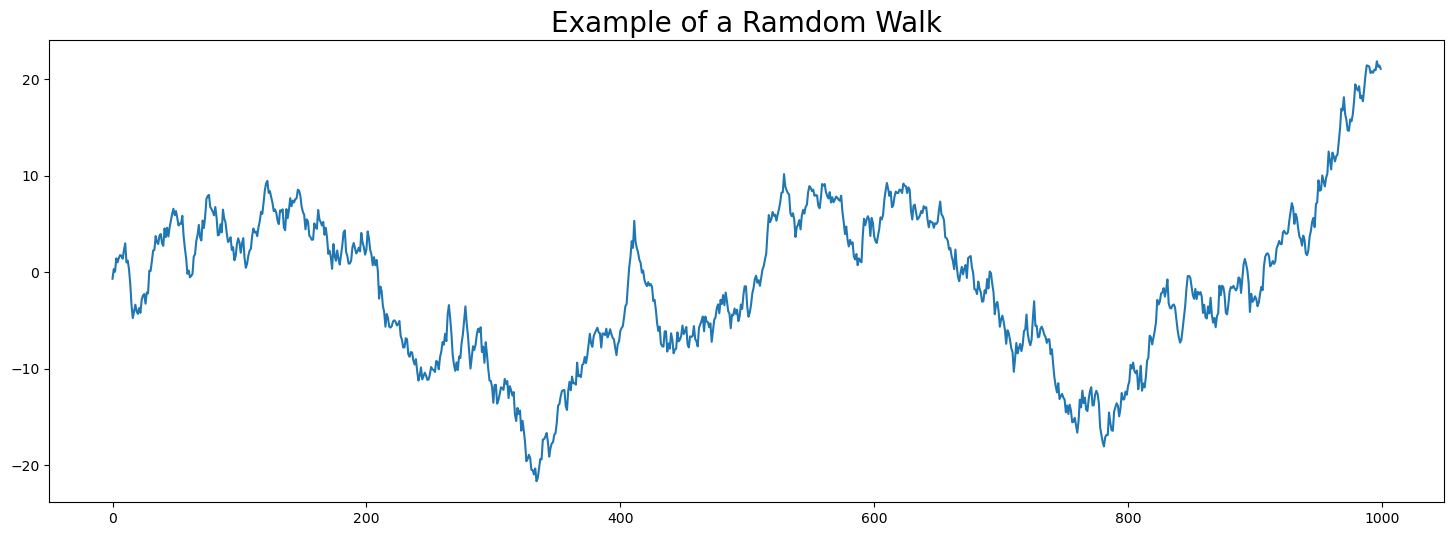

In [4]:
plt.figure(figsize=(18, 6))

plt.plot(np.arange(1000), v)
plt.title("Example of a Ramdom Walk", fontsize=20);

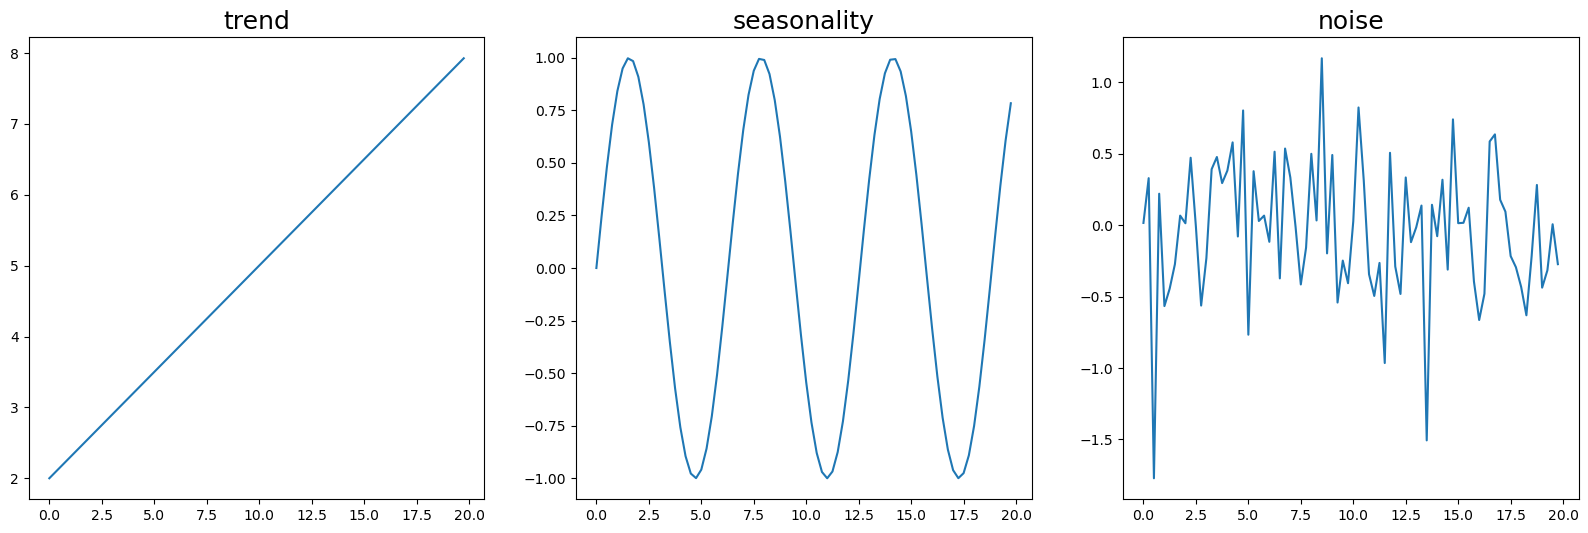

In [5]:
### Types of Time series: Combination of trend, seasonality, and noise

plt.figure(figsize=(20, 6))

x_axis = np.arange(0, 20, 0.25)

trend = np.zeros(len(x_axis))
seasonaility = np.zeros(len(x_axis))
noise = np.zeros(len(x_axis))

a = 2 
b = 0.3

for i, _ in enumerate(x_axis):
    trend[i] = a + b * x_axis[i]
    seasonaility[i] = np.sin(x_axis[i])
    noise[i] = np.random.normal(0, 0.5)    

plt.subplot(1,3,1)
plt.plot(x_axis, trend)
plt.title("trend", fontsize=18)

plt.subplot(1,3,2)
plt.plot(x_axis, seasonaility)
plt.title("seasonality", fontsize=18)

plt.subplot(1,3,3)
plt.plot(x_axis, noise)
plt.title("noise", fontsize=18);

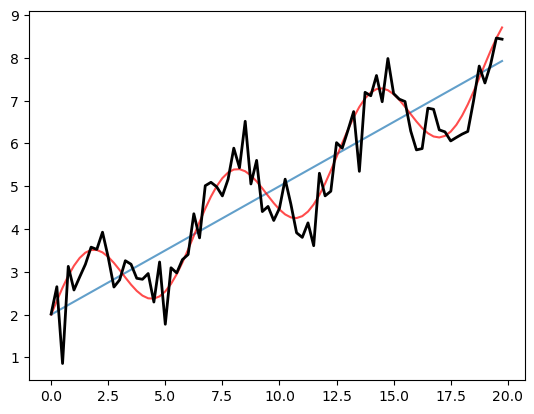

In [6]:
### Types of Time series: Combination of trend, seasonality, and noise

plt.plot(x_axis, trend, alpha=0.7)
plt.plot(x_axis, trend + seasonaility, c='r', alpha=0.7)
plt.plot(x_axis, trend + seasonaility + noise, linewidth=2, c='k');

### Time Series Example: Mauna Loa Dataset

* Looking at $\mbox{CO}_2$ level values in the atmosphere as measured on Mauna Loa on the Big Island

* The data was recorded monthly between 1959 and 1990

* We model this dataset to highlight the three different components of time series

$$ 
\text{Time} ~~ \text{Series} ~~\overline{\underline{\text{is compsed of}}} ~~Trend + Seasonality + Stochastic ~ Fluctuations
$$

In [7]:
co2_data = pd.read_csv("data/carbon_dioxide.txt", names=["co2_val"])
co2_data.co2_val = co2_data.co2_val.astype('float64')

In [8]:
co2_data = pd.read_csv("data/carbon_dioxide.txt", names=["co2_val"])
co2_data

,co2_val
0,315.42
1,316.32
2,316.49
3,317.56
4,318.13
...,...
379,352.68
380,350.72
381,350.92
382,352.55


### `pandas` and Time Series 

* `pandas` makes it easy to work with time series

* Extensive functionality to align multiple time series, subsample, impute missing values, etc.

* We will cover some functionality but refer to Wes McKinney's book for thorough coverage
    * Chapter is available online (link in the course syllabus)

* Documentation on https://pandas.pydata.org/pandas-docs/stable/timeseries.html    

In [9]:
# Generates ranges as timestamps, which are more appropriate for time series data
# Index is of type `pandas Timestamps`

dateIndex = pd.to_datetime(pd.date_range('1/1/1959', periods=len(co2_data), freq="MS"))
dateIndex

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '1990-03-01', '1990-04-01', '1990-05-01', '1990-06-01',
               '1990-07-01', '1990-08-01', '1990-09-01', '1990-10-01',
               '1990-11-01', '1990-12-01'],
              dtype='datetime64[ns]', length=384, freq='MS')

In [10]:
# datetime64
co2_data.index = dateIndex
print(co2_data.index)

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '1990-03-01', '1990-04-01', '1990-05-01', '1990-06-01',
               '1990-07-01', '1990-08-01', '1990-09-01', '1990-10-01',
               '1990-11-01', '1990-12-01'],
              dtype='datetime64[ns]', length=384, freq='MS')


In [11]:
co2_data.head()

,co2_val
1959-01-01,315.42
1959-02-01,316.32
1959-03-01,316.49
1959-04-01,317.56
1959-05-01,318.13


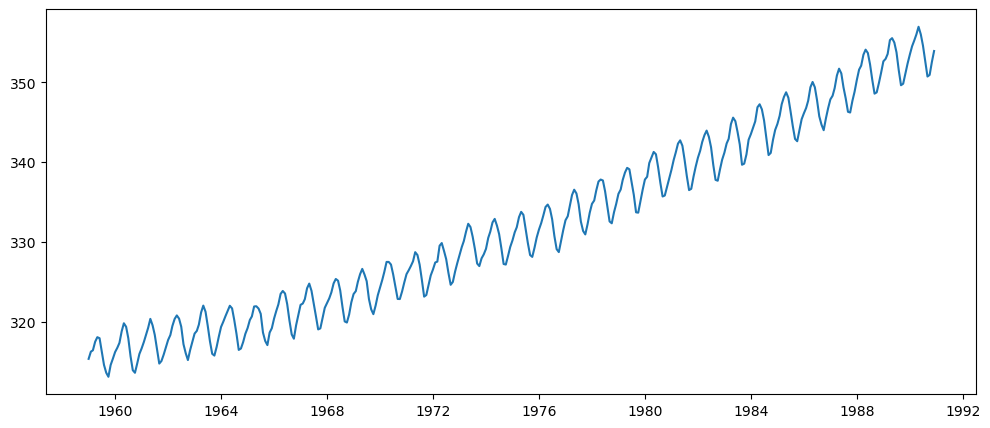

In [12]:
plt.figure(figsize=(12, 5))

plt.plot(co2_data['co2_val']);

### Indexing `datetime`

* Values of `DataFrame` with a `datetime64` index can be accessed using a partial string
  * `year` or `year-month` or `year-month-day` , etc.
     
* This includes using partial strings in ranges
  * The end index is included in the results


In [13]:
co2_data.loc['1960']

,co2_val
1960-01-01,316.27
1960-02-01,316.81
1960-03-01,317.42
1960-04-01,318.87
1960-05-01,319.87
1960-06-01,319.43
1960-07-01,318.01
1960-08-01,315.75
1960-09-01,314.00
1960-10-01,313.68


In [14]:
co2_data.loc['1960-4']

,co2_val
1960-04-01,318.87


In [15]:
co2_data.loc['1960-9':'1961-3']

,co2_val
1960-09-01,314.00
1960-10-01,313.68
1960-11-01,314.84
1960-12-01,316.03
1961-01-01,316.73
1961-02-01,317.54
1961-03-01,318.38


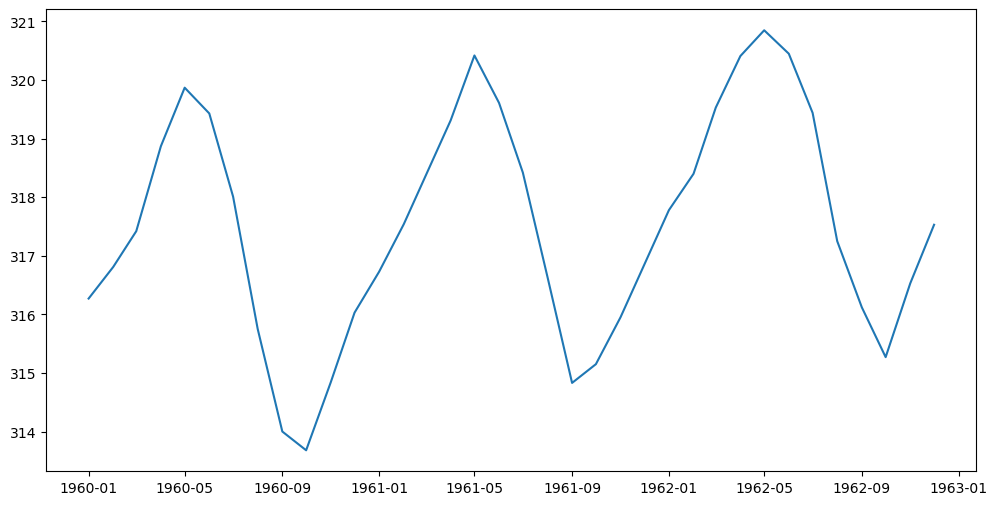

In [16]:
plt.figure(figsize=(12, 6))

plt.plot(co2_data.loc['1960':'1962']['co2_val']);

### Accessing the Subsets of the DateTime Object

* Since the index is a `timestamp` (i.e., specific instant in time), we can easily access subsets of the `timestamp`

  * day, day of the week, month, month_name, etc.

In [17]:
co2_data.index.day

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', length=384)

In [18]:
co2_data.index.dayofweek

Int64Index([3, 6, 6, 2, 4, 0, 2, 5, 1, 3,
            ...
            3, 6, 1, 4, 6, 2, 5, 0, 3, 5],
           dtype='int64', length=384)

In [19]:
# See strftime() and strptime() format codes at https://strftime.org/

co2_data.index.strftime('%A')   # full weekday name

Index(['Thursday', 'Sunday', 'Sunday', 'Wednesday', 'Friday', 'Monday',
       'Wednesday', 'Saturday', 'Tuesday', 'Thursday',
       ...
       'Thursday', 'Sunday', 'Tuesday', 'Friday', 'Sunday', 'Wednesday',
       'Saturday', 'Monday', 'Thursday', 'Saturday'],
      dtype='object', length=384)

In [20]:
co2_data.index.strftime('%b')   # abbreviated month name

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       ...
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object', length=384)

In [21]:
co2_data[co2_data.index.year.isin([1960, 1970])]

,co2_val
1960-01-01,316.27
1960-02-01,316.81
1960-03-01,317.42
1960-04-01,318.87
1960-05-01,319.87
1960-06-01,319.43
1960-07-01,318.01
1960-08-01,315.75
1960-09-01,314.00
1960-10-01,313.68


In [22]:
sample_4years = co2_data[co2_data.index.year.isin([1960, 1970, 1980, 1990])]
sample_4years.head()

,co2_val
1960-01-01,316.27
1960-02-01,316.81
1960-03-01,317.42
1960-04-01,318.87
1960-05-01,319.87


In [23]:
print(sample_4years.index.year)
print("\n----------\n")
print(len(sample_4years.index.year))

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            1960, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
            1970, 1970, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            1980, 1980, 1980, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
            1990, 1990, 1990, 1990],
           dtype='int64')

----------

48


In [24]:
sample_4years.loc['1960']

,co2_val
1960-01-01,316.27
1960-02-01,316.81
1960-03-01,317.42
1960-04-01,318.87
1960-05-01,319.87
1960-06-01,319.43
1960-07-01,318.01
1960-08-01,315.75
1960-09-01,314.00
1960-10-01,313.68


### Modeling the Trend and  Seasonality

1. Exploring the trend and seasonality

2. Forming a hypothesis

3. Writing and testing the model to account for the trend and seasonality
   * Naturally, we cannot model the residual noise

###  1- Exploring the Data

* Data exploration is an important aspect of data analysis
    * Critical for time series data
    
*  Some important questions
   * Is the data seasonal?
   * What are the lows and highs?
   * Is the seasonality consistent?
      * How much variation is there?
  
* This is, principally, an exploratory activity
  * Any method that allows us to ascertain presence or absence of a trend is fine

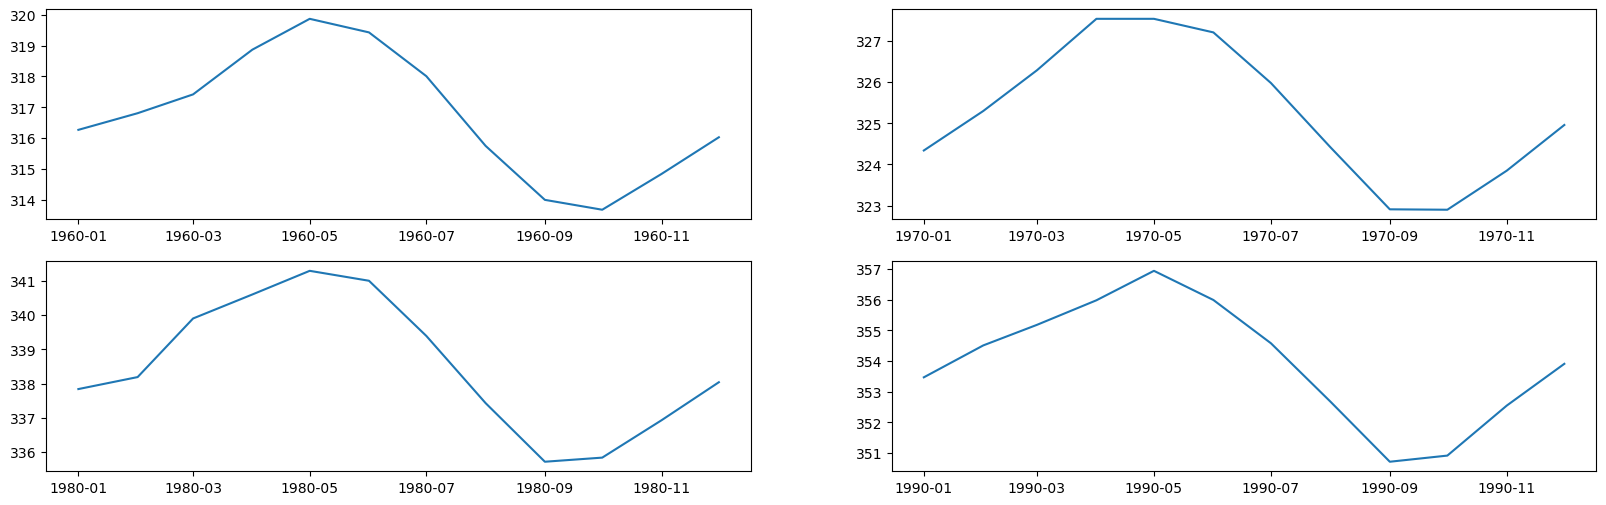

In [25]:
plt.figure(figsize=(20, 6))
plt.subplot(2,2,1)
plt.plot(sample_4years.loc['1960']['co2_val'])

plt.subplot(2,2,2)
plt.plot(sample_4years.loc['1970']['co2_val'])

plt.subplot(2,2,3)
plt.plot(sample_4years.loc['1980']['co2_val'])

plt.subplot(2,2,4)
plt.plot(sample_4years.loc['1990']['co2_val']);

### Using a Boxplot to Explore Seasonality

<center><img src="images/boxplot.png" alt="drawing" style="width:300px;"/>


In [26]:
# Examine seasonal trend in the data

co2_data['Month'] = co2_data.index.strftime('%b')
co2_data['Year'] = co2_data.index.year

co2_data.head()

,co2_val,Month,Year
1959-01-01,315.42,Jan,1959
1959-02-01,316.32,Feb,1959
1959-03-01,316.49,Mar,1959
1959-04-01,317.56,Apr,1959
1959-05-01,318.13,May,1959


In [27]:
co2_data_piv = co2_data.pivot(index='Year', columns='Month', values='co2_val')

co2_data_piv.head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1959,317.56,314.66,315.43,316.32,315.42,316.39,318.00,316.49,318.13,314.66,313.18,313.68
1960,318.87,315.75,316.03,316.81,316.27,318.01,319.43,317.42,319.87,314.84,313.68,314.00
1961,319.31,316.64,316.85,317.54,316.73,318.42,319.61,318.38,320.42,315.95,315.15,314.83
1962,320.41,317.25,317.53,318.40,317.78,319.44,320.45,319.53,320.85,316.53,315.27,316.12
1963,321.22,317.61,318.20,318.92,318.58,319.58,321.31,319.70,322.08,316.91,315.83,316.05


In [28]:
# We reindex the data to have the months in order

orderedMonths = ["Jan", "Feb", "Mar", 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

co2_data_piv = co2_data_piv.reindex(columns=orderedMonths)

co2_data_piv.head()

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1959,315.42,316.32,316.49,317.56,318.13,318.00,316.39,314.66,313.68,313.18,314.66,315.43
1960,316.27,316.81,317.42,318.87,319.87,319.43,318.01,315.75,314.00,313.68,314.84,316.03
1961,316.73,317.54,318.38,319.31,320.42,319.61,318.42,316.64,314.83,315.15,315.95,316.85
1962,317.78,318.40,319.53,320.41,320.85,320.45,319.44,317.25,316.12,315.27,316.53,317.53
1963,318.58,318.92,319.70,321.22,322.08,321.31,319.58,317.61,316.05,315.83,316.91,318.20


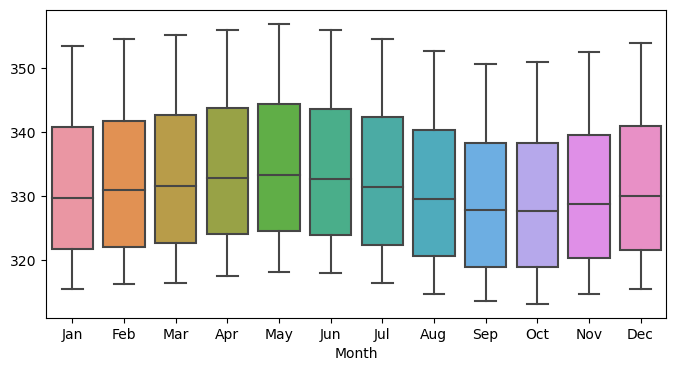

In [29]:
plt.figure(figsize=(8, 4))

sns.boxplot(data=co2_data_piv);

### 2- Forming a Hypothesis

* The seasonality hypothesis is also supported by the boxplot above

* Below, we only explored four years-worth of data, but both representations indicate the presence of a consistent seasonality signal in the data
  * Confirmed using two methods

<center><img src="images/seasonality.png" width="1000"/>
<center><i>The seasonality looks sinusoidal with a period of one year.</i></center>


### 2- Exploring the Trend

* Here again, the activity is exploratory. 
   * Where do we start?
   
* We can use any visualization that can help us identify the trend if one is present.
  * Can you provide an example?

### 2- Exploring the Trend

* Here again, the activity is exploratory. 
   * Where do we start?
   
* We can use any visualization that can help us identify the trend if one is present.

In [30]:
sample_4years = pd.DataFrame({"co2_val": sample_4years["co2_val"], 'year': sample_4years.index.year})
sample_4years.head()

,co2_val,year
1960-01-01,316.27,1960
1960-02-01,316.81,1960
1960-03-01,317.42,1960
1960-04-01,318.87,1960
1960-05-01,319.87,1960


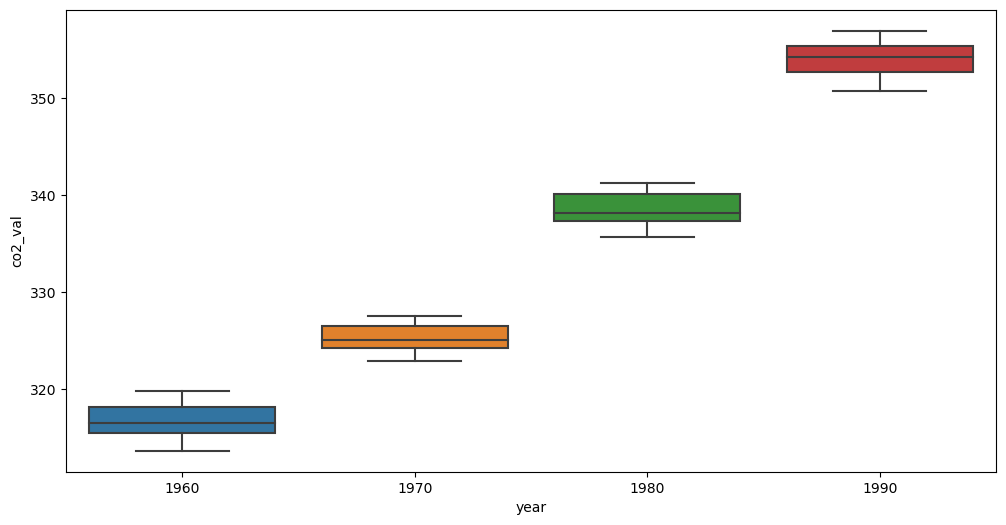

In [31]:
plt.figure(figsize=(12, 6))

sns.boxplot(x="year", y="co2_val", data=sample_4years);

### Avereging Data Per Period

* We inspect the overall trend by plotting the average of $\mbox{CO}_2$ values averaged per year

* We need to group the data by year
  - Instead of using `groupby` as we did in the past, we will use `resample`
  - `resample` takes time related parameters that indicate how we intend to `groupby`
  - `AS` means `ANNUAL, START`


### Avereging/Aggregating Data Per Period

* We inspect the overall trend by plotting the $\mbox{CO}_2$ values aggregated per year

* We need to group the data by year
  - Instead of using `groupby` as we did in the past, we will use `resample`
  - `resample` takes time related parameters that indicate how we intend to `groupby`
  - `AS` means `ANNUAL, START`


In [32]:
annual_sums = co2_data['co2_val'].resample('AS').sum()
annual_sums

1959-01-01    3789.920000
1960-01-01    3800.980000
1961-01-01    3809.830000
1962-01-01    3819.560000
1963-01-01    3825.990000
1964-01-01    3833.549991
1965-01-01    3838.470000
1966-01-01    3854.540000
1967-01-01    3864.240000
1968-01-01    3873.980000
1969-01-01    3887.190000
1970-01-01    3903.240000
1971-01-01    3913.880000
1972-01-01    3927.540000
1973-01-01    3954.130000
1974-01-01    3960.980000
1975-01-01    3971.810000
1976-01-01    3983.810000
1977-01-01    4004.760000
1978-01-01    4024.030000
1979-01-01    4040.170000
1980-01-01    4062.170000
1981-01-01    4077.130000
1982-01-01    4091.500000
1983-01-01    4111.310000
1984-01-01    4130.940000
1985-01-01    4148.740000
1986-01-01    4163.890000
1987-01-01    4185.460000
1988-01-01    4216.150000
1989-01-01    4233.020000
1990-01-01    4247.430000
Freq: AS-JAN, Name: co2_val, dtype: float64

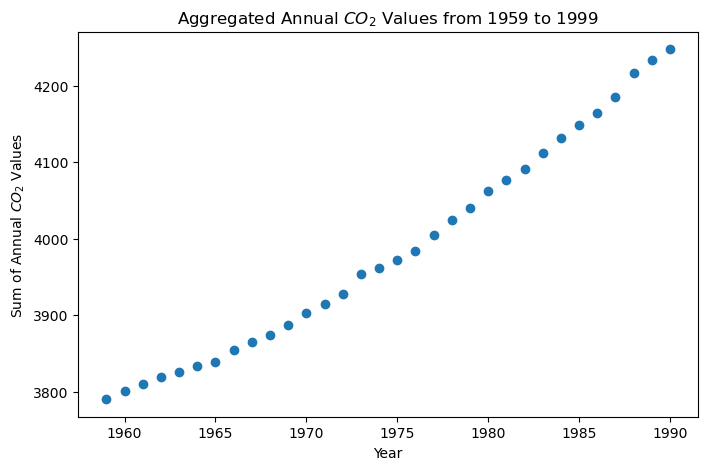

In [33]:
_, ax = plt.subplots(figsize=(8, 5))

plt.scatter(np.array(range(len(annual_sums))) + 1959, annual_sums)

ax.set_title('Aggregated Annual $CO_2$ Values from 1959 to 1999')
ax.set_ylabel('Sum of Annual $CO_2$ Values')
ax.set_xlabel('Year')
ax.xaxis.set_ticks_position('bottom');

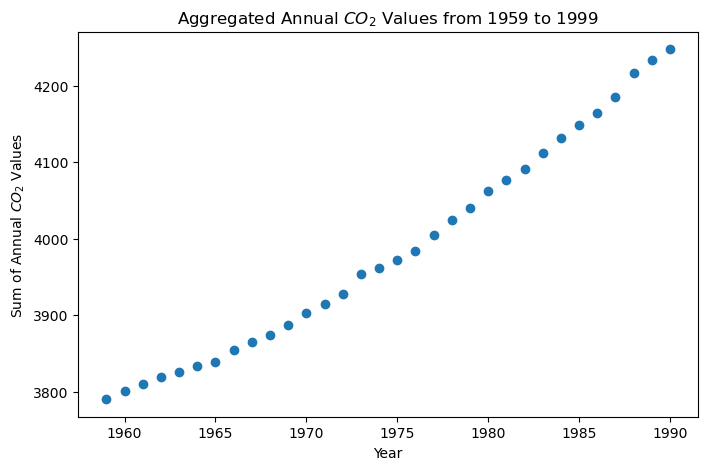

In [34]:
plt.figure(figsize=(8, 5))

plt.scatter(np.array(range(len(annual_sums))) + 1959, annual_sums)

plt.title('Aggregated Annual $CO_2$ Values from 1959 to 1999')
plt.ylabel('Sum of Annual $CO_2$ Values')
plt.xlabel('Year')
ax = plt.gca()
ax.xaxis.set_ticks_position('bottom')

### 2- Forming a Hypothesis

* Both visualizations show that there is a trend in the data

  * A continuous increase in $\mbox{CO}_2$ concentrations over time
  * Both are good ways to show the trend in the data


### Some Useful Time Series  Modeling Tips

<br>
It's usually helpful to: 

1. Have the data go through the origin 
  * Make it easier to tweak a function that represents the data
  * This can be achieved by simply subtracting the offset from the data (shifting the time series)
  
2. Represent the $x$-axis in a numerical form so that we can use it in the model
  * Harder to model date or string labels
  * We can achieve this by replacing the year/month by a sequential number representing the number of months since the first measurement

<center><img src="images/before_after.png" width=500/>

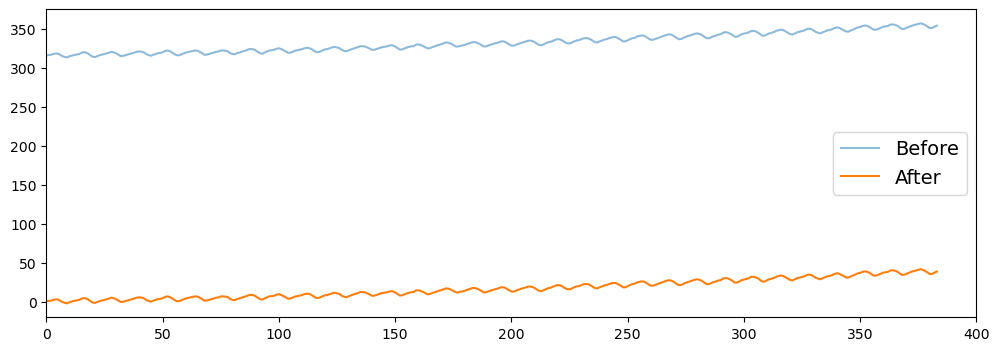

In [35]:
normalized_col = pd.DataFrame(co2_data['co2_val'] - co2_data['co2_val'].iloc[0])
normalized_col.index = range(0, len(normalized_col))

plt.figure(figsize=(12, 4))

plt.plot(normalized_col.index, co2_data['co2_val'], alpha=0.5, label="Before")
plt.plot(normalized_col['co2_val'], label="After")
plt.xlim(0, 400)
plt.legend(fontsize=14);

### Using an Appropriate Model for the Trend

<br>
Let's start modeling the data by describing the trend in the data

- How can we describe the trend? 
  - The increase does not appear to be linear

- Does it follow a power law?

$$
    f(x) = c_0 + c \cdot x^m 
$$

* Useful to be familiar with some of the most common parent functions
  * Starting point that can be tweaked to provide better fits.
  * Ex.: https://www.onlinemathlearning.com/parent-functions.html

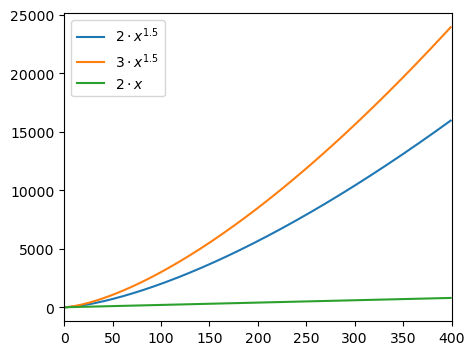

In [36]:
def func_powerlaw(x, m, c, c0):
    return c0 + c * x**m

x = np.arange(0, 400, 1)

y_1 = func_powerlaw(x, 1.5, 2, 0)
y_2 = func_powerlaw(x, 1.5, 3, 0)
y_3 = func_powerlaw(x, 1., 2, 0)

plt.figure(figsize=(5, 4))

plt.plot(x, y_1, label="$2 \cdot x^{1.5}$")
plt.plot(x, y_2, label="$3 \cdot x^{1.5}$")
plt.plot(x, y_3, label="$2 \cdot x$")
plt.xlim(0, 400)
plt.legend();

### What is a Time Series Noise?

- Noise to be is an undesired additive signal with: 

  - Constant mean
  - Constant standard deviation
  - Noise values at each time point are independent of each other


### Working with Noisy Data

* Noise is often an inevitable part of time series
  
* If we are only interested in trend, seasonality can be a form of noise

* How can we correct for noise (here seasonality)?
    * Averaging or taking the sum of values per year as we did before? 
      * We would lose the bulk of the data
      * Started with monthly but we would end up with yearly


### Smoothing with a Sliding Window

* Smoothing is used to capture essential patterns in the data 
  * Correct data so that points in a specific area are recomputed using some given function. E.g.: 
    * as a mean of all the points in that area
      * Sliding windows (a.k.a, rectangular boxcar, unweighted sliding-average smooth, etc.) 
    * weighted sliding window
      * E.g., points that are nearby will contribute more than points that are farther away
    * etc.
* When using a sliding window, a point's new value is computed using all the points in the window
  * Ex. using average

<center><img src="images/smoothing.png"/>

### Smoothing with a Sliding Window

* Smoothing is used to capture essential patterns in the data 
  * Correct data so that points in a specific area are recomputed using some given function. E.g.: 
    * as a mean of all the points in that area
      * Sliding windows (a.k.a, rectangular boxcar, unweighted sliding-average smooth, etc.) 
    * weighted sliding window
      * E.g., points that are nearby will contribute more than points that are farther away
    * etc.

### Smoothing with a Sliding Window -- Cont'd 

* When using a sliding window, a point's new value is computed using all the points in the window

<center><img src="images/smoothing.png"/>

* Note that this is different from what we did earlier by averaging (or summing each year)

  * When averaging by year, 3 years worth of data is averaged into 3 data points
  * With a sliding window of size 12, 3 years worth of data generates 25 data points


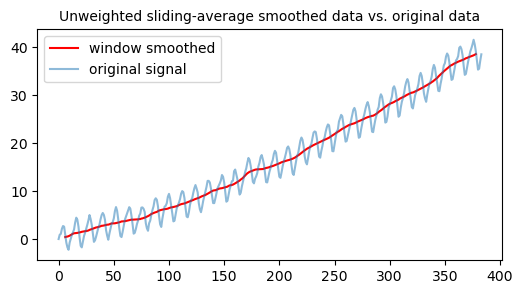

In [37]:
x_axis = normalized_col.index
y_axis = normalized_col['co2_val'].rolling(window=12, center=True).mean()

plt.figure(figsize=(6, 3))
plt.plot(x_axis, y_axis, 'r', label="window smoothed")
plt.plot(x_axis, normalized_col['co2_val'], alpha=0.5, label="original signal")
plt.title("Unweighted sliding-average smoothed data vs. original data", fontsize=10)
plt.legend();

### Question

* Above, we took a sliding window of size 12. What will happen if we change the size of the sliding window?
  
  * What happens if we take a larger sliding window?
  * What happens if we take a smaller sliding window?
    

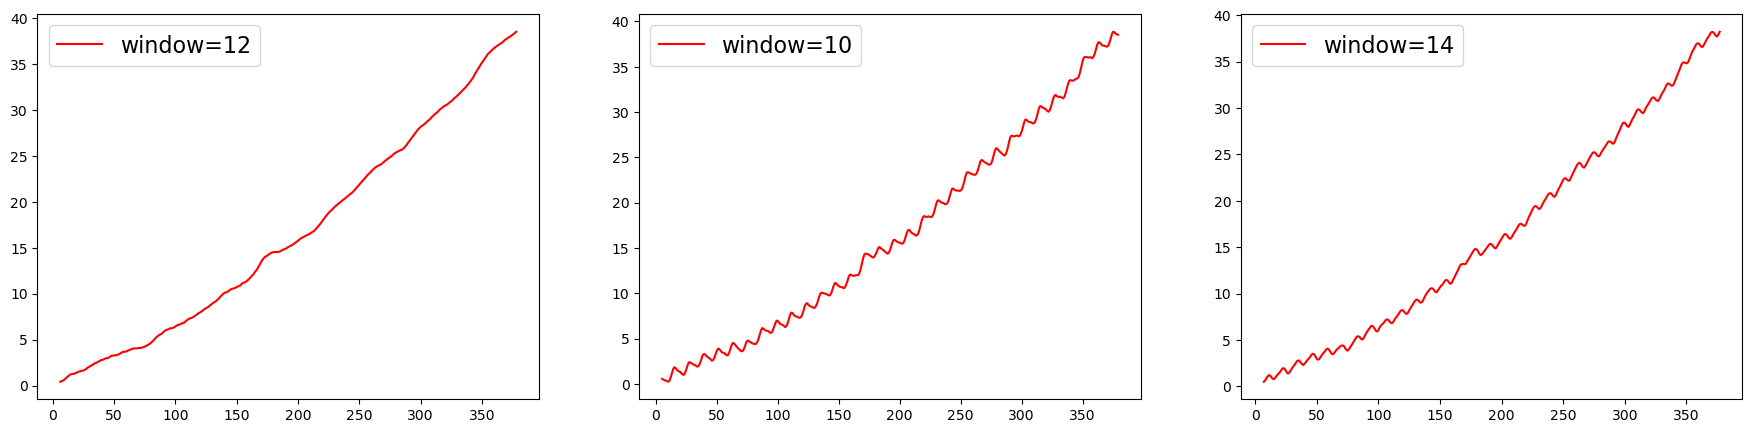

In [38]:
y_axis_10 = normalized_col['co2_val'].rolling(window=10, center=True).mean()
y_axis_14 = normalized_col['co2_val'].rolling(window=14, center=True).mean()

plt.figure(figsize=(22, 5))

plt.subplot(1, 3, 1)
plt.plot(x_axis, y_axis, 'r', label="window=12")
plt.legend(fontsize=16)
plt.subplot(1, 3, 2)
plt.plot(x_axis, y_axis_10, 'r', label="window=10")
plt.legend(fontsize=16)
plt.subplot(1, 3, 3)
plt.plot(x_axis, y_axis_14, 'r', label="window=14")
plt.legend(fontsize=16);

### Smoothing with a Sliding Window -- Cont'd

* Note that the first 6 and last 5 observations are missing since we don’t have sufficient data at these edges to average them

* We can now model the trend that we observed in the smoother signal
* We thought a power law could be a good approximation for the data
  * Typically, you may (most likley will) have to try different functions to see which one fits the best
    * Which model is most accurate for representing your data?
    * Can you think of a way to estimate which function provides the best fit?
    
* E.g., can we use an exponential function instead?
$$
f(x) = c_0 + c \cdot m^x
$$

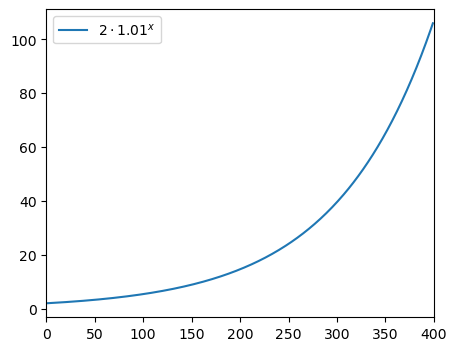

In [39]:
def func_exponential(x, m, c, c0):
    return c0 + c * (m**x)

x = np.arange(0, 400, 1)

y_1 = func_exponential(x, 1.01, 2, 0)

plt.figure(figsize=(5, 4))

plt.plot(x, y_1, label="$2 \cdot {1.01}^x$")
plt.xlim(0, 400)
plt.legend();

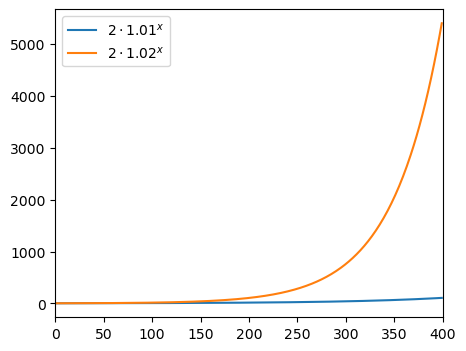

In [40]:
def func_exponential(x, m, c, c0):
    return c0 + c * (m**x)

x = np.arange(0, 400, 1)

y_1 = func_exponential(x, 1.01, 2, 0 )
y_2 = func_exponential(x, 1.02, 2, 0 )
# y_3 = func_exponential(x, 1.8, 2, -1 )

plt.figure(figsize=(5, 4))

plt.plot(x, y_1, label="$2 \cdot {1.01}^x$")
plt.plot(x, y_2, label="$2 \cdot {1.02}^x$")
# plt.plot(x, y_3, label= "$-1 + 2 \cdot {1.8}^x $")
plt.xlim(0, 400)
plt.legend();

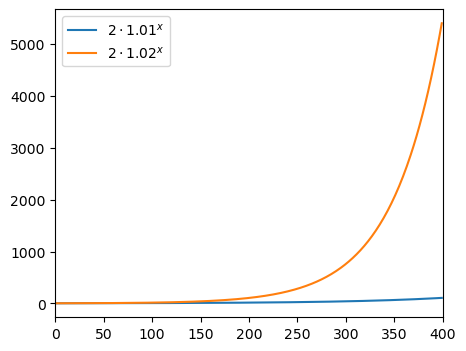

In [41]:
def func_exponential(x, m, c, c0):
    return c0 + c * (m**x)

x = np.arange(0, 400, 1)

y_1 = func_exponential(x, 1.01, 2, 0)
y_2 = func_exponential(x, 1.02, 2, 0)

plt.figure(figsize=(5, 4))

plt.plot(x, y_1, label="$2 \cdot {1.01}^x$")
plt.plot(x, y_2, label="$2 \cdot {1.02}^x$")
plt.xlim(0, 400)
plt.legend();

### Selecting the Appropriate Model

* Here, even if the exponential has the correct shape, the parameters (e.g., `m`) will be difficult to find 
  * Minor perturbations will lead to major changes in the curve
  * Minor perturbations will lead to poor fit

* Power law is more appropriate here

$$
    f(x) = c_0 + c \cdot x^m 
$$


### Modeling the Smoothed Data

* We could manually tweak the parameters $m$, $c$ and $c_0$ to produce the best fit between our smoothed data and the power law

  * The closer the function is to the data, the better the fit 


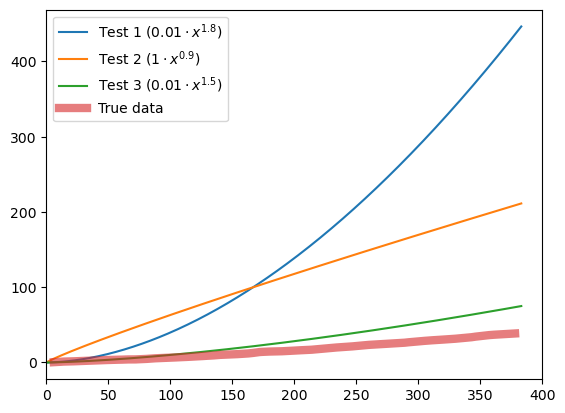

In [42]:
plt.plot(x_axis, func_powerlaw(x_axis, 1.8, 0.01, 0), label='Test 1 ($0.01 \cdot x^{1.8}$)')
plt.plot(x_axis, func_powerlaw(x_axis, 0.9, 1, 0), label='Test 2 ($1 \cdot x^{0.9}$)')
plt.plot(x_axis, func_powerlaw(x_axis, 1.5, 0.01, 0), label='Test 3 ($0.01 \cdot x^{1.5}$)')
plt.plot(x_axis, y_axis, linewidth=6, alpha=0.6, label="True data")
plt.xlim(0, 400)
plt.legend();

### Modeling the Smoothed Data -- Cont'd

* We can use the `curve_fit` function in `scipy.optimize` to identify the best values for the parameters ($c_0$, $c$ and $m$).

  * https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

* `curve_fit()`
  * takes the data and the parameters we would like to optimize
  * returns:
      * `popt`: optimal parameters found by the curve fit
      * `pcov`: estimated covariance of `popt` which tells us how good is the fit against our data
  * We will ignore `pcov` and visually validate the fit instead
  
* Note: Numerical approximation algorithms tend to work better if the values to be estimated are not very small or very large
  * Very small changes to the parameters lead to poor fit
 

### Modeling the Smoothed Data -- Cont'd

* We can use the `curve_fit` function in `scipy` to identify the best values for the parameters ($c_0$, $c$ and $m$).

* `curve_fit()`
  * takes the data and the parameters we would like to optimize
  * returns:
      * `popt`: optimal parameters found by the curve fit
      * `pcov`: estimated covariance of `popt` which tells us how good is the fit against our data
  * We will ignore `pcov` and visually validate the fit instead
 

In [43]:
popt, _ = curve_fit(func_powerlaw, x_axis[6:-5], y_axis[6:-5], maxfev=2000)
popt

array([1.45189553, 0.00684858, 0.97702883])

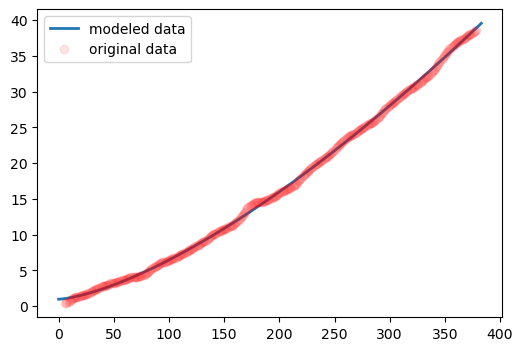

In [44]:
plt.figure(figsize=(6, 4))
plt.plot(x_axis, func_powerlaw(x_axis, *popt), linewidth=2, label='modeled data')
plt.plot(x_axis, y_axis, 'ro', alpha=0.1, label="original data")
plt.legend();

### Subtracting the Trend

- We need to model the seasonal effect in the data

* To do so, it's common to remove the trend in the data
  * Similar to how we subtracted the seasonality using the smoothing when we were modeling the trend
  * Allows us to focus on the seasonality while abstracting out the trend 

* Since we know the equation for the trend, we can use it to remove the trend at each time point


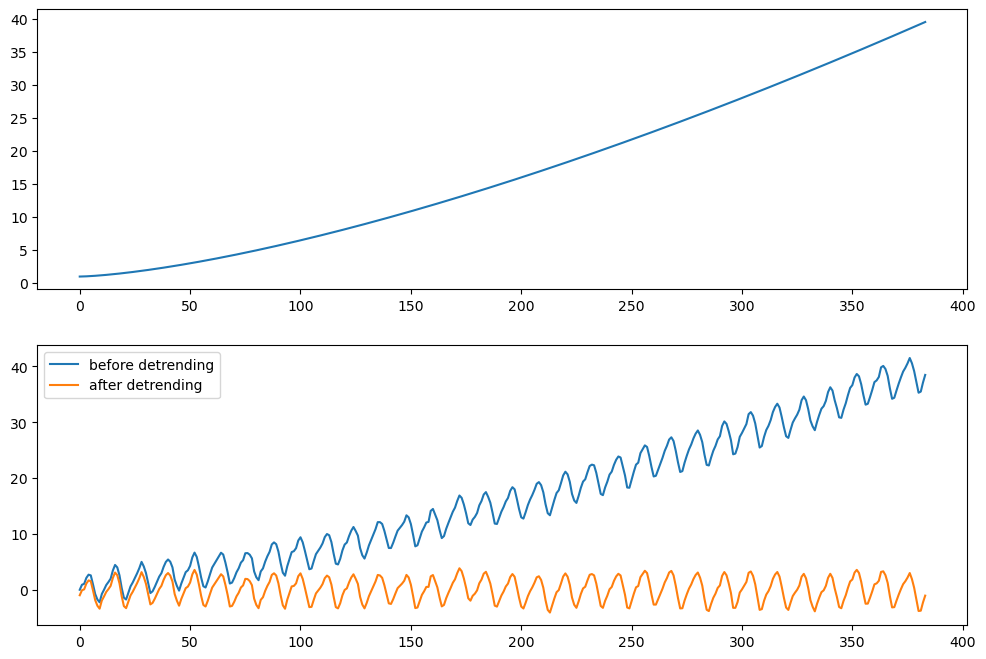

In [45]:
f, ax = plt.subplots(2, figsize=(12, 8))

ax[0].plot(x_axis, func_powerlaw(x_axis, popt[0], popt[1], popt[2]), '-')

plt.plot(x_axis, normalized_col['co2_val'], label="before detrending")

residuals = normalized_col['co2_val'] - func_powerlaw(x_axis, popt[0], popt[1], popt[2])
plt.plot(x_axis, residuals, label="after detrending")
plt.legend();

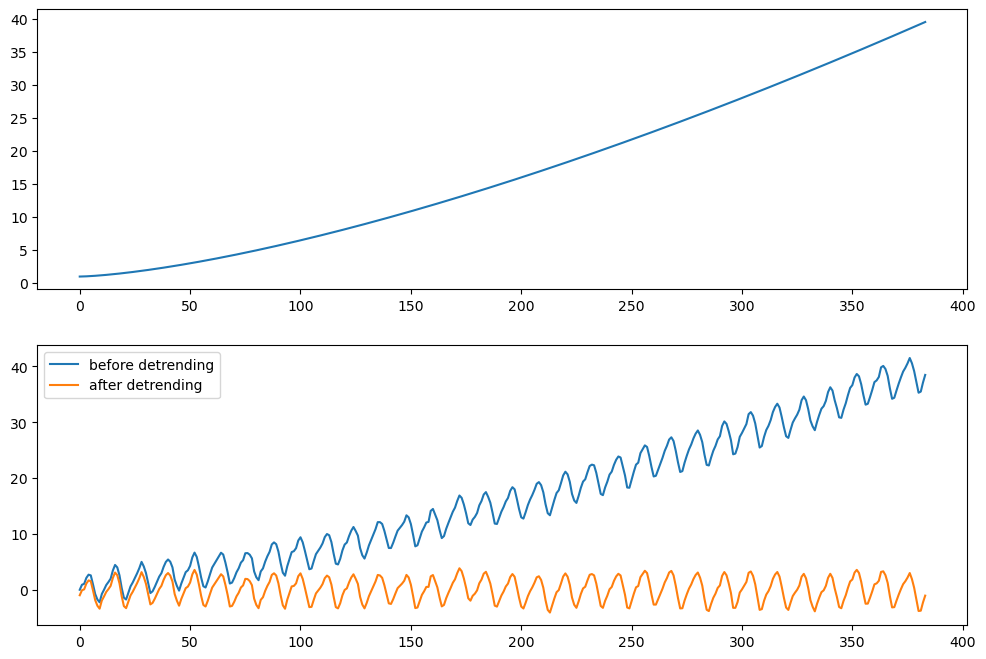

In [46]:
f, ax = plt.subplots(2, figsize=(12, 8))

ax[0].plot(x_axis, func_powerlaw(x_axis, *popt))
ax[1].plot(x_axis, normalized_col['co2_val'], label="before detrending")

residuals = normalized_col['co2_val'] - func_powerlaw(x_axis, *popt)
ax[1].plot(x_axis, residuals, label="after detrending")
plt.legend();

### Subtracting the Seasonality

* After removing the trend, we are now left with periodicity reflective of the seasonality that is in the data
  * We don't need to worry about the trend when modeling the seasonality

* The residuals' `signal` is periodic and starts at point 0
* Has a value of $0$ at $x=0$ 


### Modeling the Periodic Signal

- Therefore, we can try to model the periodicity with a sine curve

$$
y = a \cdot sin(b\cdot x)
$$ 
* `b` determines the period
  * The natural period of the sine curve is $2\pi$
* `a` determines the amplitude

<center><img src="images/sin_cos.png" width="500px"></center>

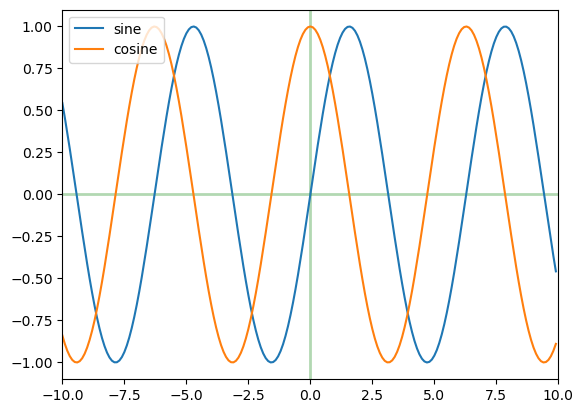

In [47]:
plt.axhline(y=0, linewidth=2, color='g', alpha=.3)
plt.axvline(x=0, linewidth=2, color='g', alpha=.3)
plt.xlim(-10, 10)
plt.plot(np.arange(-10, 10, 0.1), np.sin(np.arange(-10, 10, 0.1)), label="sine")
plt.plot(np.arange(-10, 10, 0.1), np.cos(np.arange(-10, 10, 0.1)), label="cosine")
plt.legend();

### Subtracting the Seasonality -- Cont'd 

- For the period, recall that the data is meteorological (cycle should repeat every 12 months?)
  - $2\pi$ = 12 months
  - We simply divide by 12 so that for $x = 12, 24, 36, \dots$, we have $sin(\frac{2  \pi x}{12}): sin(\frac{2  \pi 12}{12}) = sin(\frac{2  \pi 24}{12}) = sin(\frac{2  \pi 36}{12})= \cdots = 0$


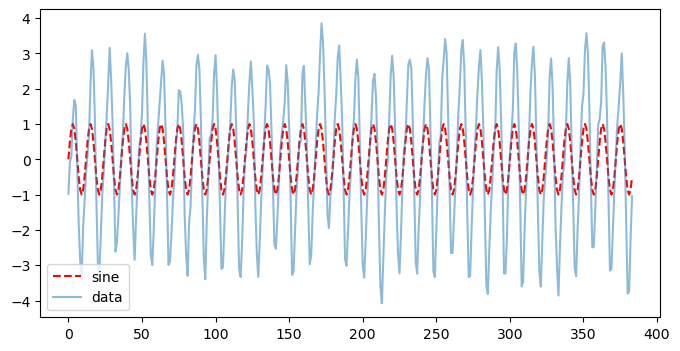

In [48]:
ax = plt.figure(figsize=(8, 4))

plt.plot(x_axis, np.sin(2 * np.pi * x_axis / 12 ), 'r--', label='sine')
plt.plot(x_axis, residuals, label="data", alpha=0.5)
plt.legend();

- For the amplitude, the data suggests a value of ~ 3 
  - We amplify (multiply) the signal by 3

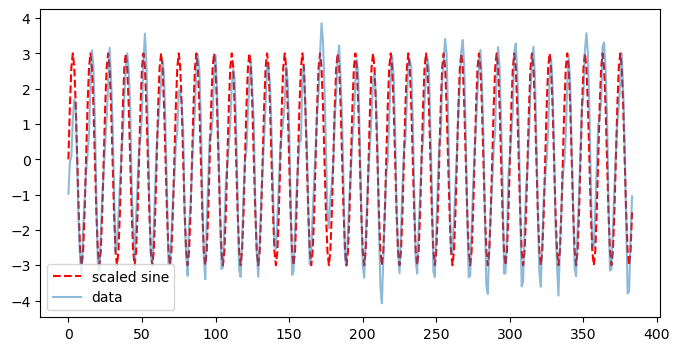

In [49]:
ax = plt.figure(figsize=(8, 4))

plt.plot(x_axis, 3 * np.sin(2 * np.pi * x_axis / 12 ), 'r--', label='scaled sine')
plt.plot(x_axis, residuals, label="data", alpha=0.5)
plt.legend();

### Modeling the Data

* As mentioned earlier, we can think of the time series $y_t$ as a combination of three components: 
    * A trend-cycle component
    * A seasonal component 
    * Remainder, which usually are stochastic fluctuations, or errors

* Here we will skip the error component and combine  the trend and the seasonality to approximate the data


### Modeling the Data

* As mentioned earlier, we can think of the time series $y_t$ as a combination of three components: 
    * A trend component
    * A seasonal component 
    * Remainder, which usually are stochastic fluctuations, or errors

* Here we will skip the error component and combine  the trend and the seasonality to approximate the data


In [50]:
def fx(x):
    trend = func_powerlaw(x, *popt) 
    seasonality = (3 * np.sin(2 * np.pi * x / 12))
    return trend + seasonality

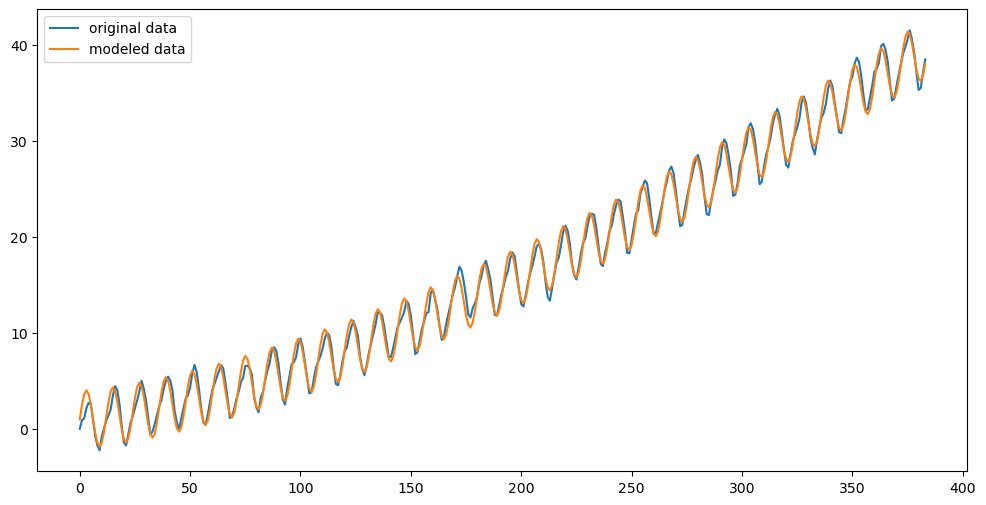

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(normalized_col['co2_val'], label="original data")
plt.plot(x_axis, fx(x_axis), label="modeled data")
plt.legend();

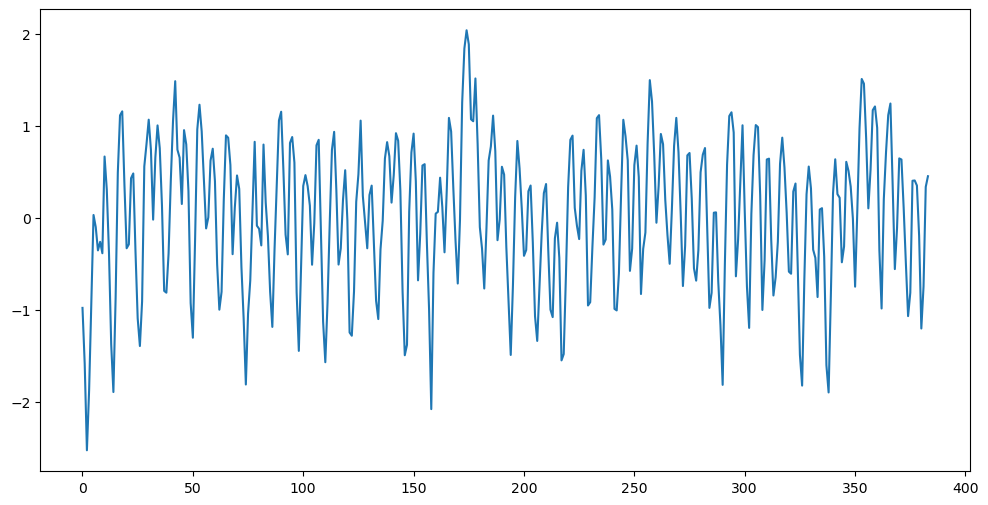

In [52]:
plt.figure(figsize=(12, 6))

residuals = normalized_col['co2_val'] - fx(x_axis)
plt.plot(x_axis, residuals);

### Residual Seasonality 

* The residuals are rather small here: avg ~ [-2, 2]

* This fit is still not perfect as there is still some residual seasonality
  - It's not as obvious as in the raw signal
  - We can zoom on the residuals between regions [60 - 120] to observe the remaining seasonality


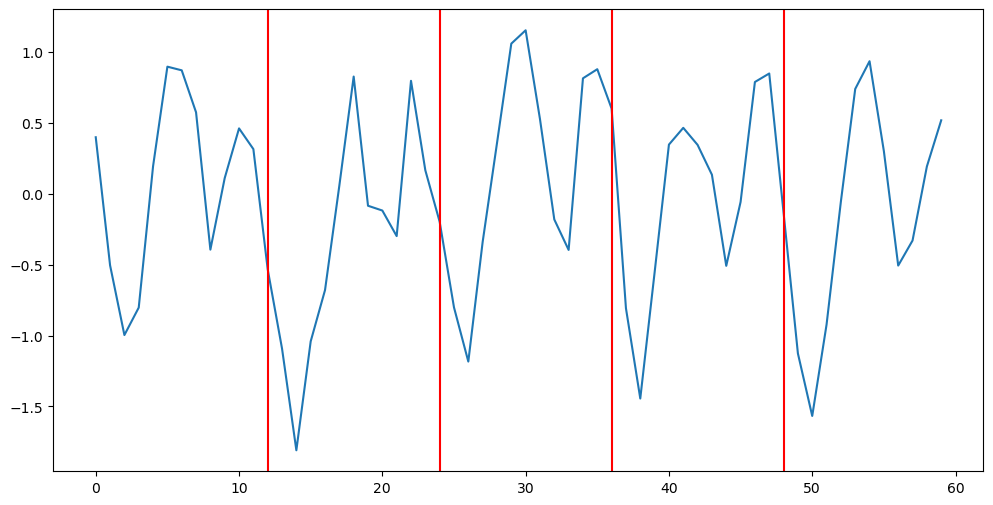

In [53]:
plt.figure(figsize=(12, 6))

plt.plot(range(len(residuals[60: 120])), residuals[60: 120])

plt.axvline(x=12, color='r') 
plt.axvline(x=24, color='r') 
plt.axvline(x=36, color='r') 
plt.axvline(x=48, color='r');

In [54]:
print(residuals.sum())
residuals.head()

11.326281299185487


0   -0.977029
1   -1.583877
2   -2.523841
3   -1.870783
4   -0.916359
dtype: float64

### Residual Seasonality -- Cont'd

- We note that there is still 12-months trend in the data
 - Large peaks are separated by 12 data points
 - [low, high, low, high, low], [low, high, low, high, low], ...

- This is since our sine wave does not fully capture all the seasonality in the data
  - We need to consider higher harmonics
    
- Harmonic is simply a wave $f_n$ such that:

$$
   f_n = n \times f_1,
$$

$\hspace{0.6in}$ where `n` is an integer multiple of the initial frequency (first harmonic) $f_1$


### Residual Seasonality -- Cont'd

- We note that there is still 12-months trend in the data
 - Large peaks are separated by 12 data points
 - [low, high, low, high, low], [low, high, low, high, low], ...

- This is since our sine wave does not fully capture all the seasonality in the data
  - We need to consider higher harmonics
    
- A harmonic is simply a sine wave with frequency $f_n$ such that:

$$
   f_n = n \times f_1,
$$

$\hspace{0.6in}$ where `n` is a positive integer. 

$\hspace{0.6in}$ I.e., $f_n$ is an integer multiple of the fundamental frequency $f_1$ (first harmonic)


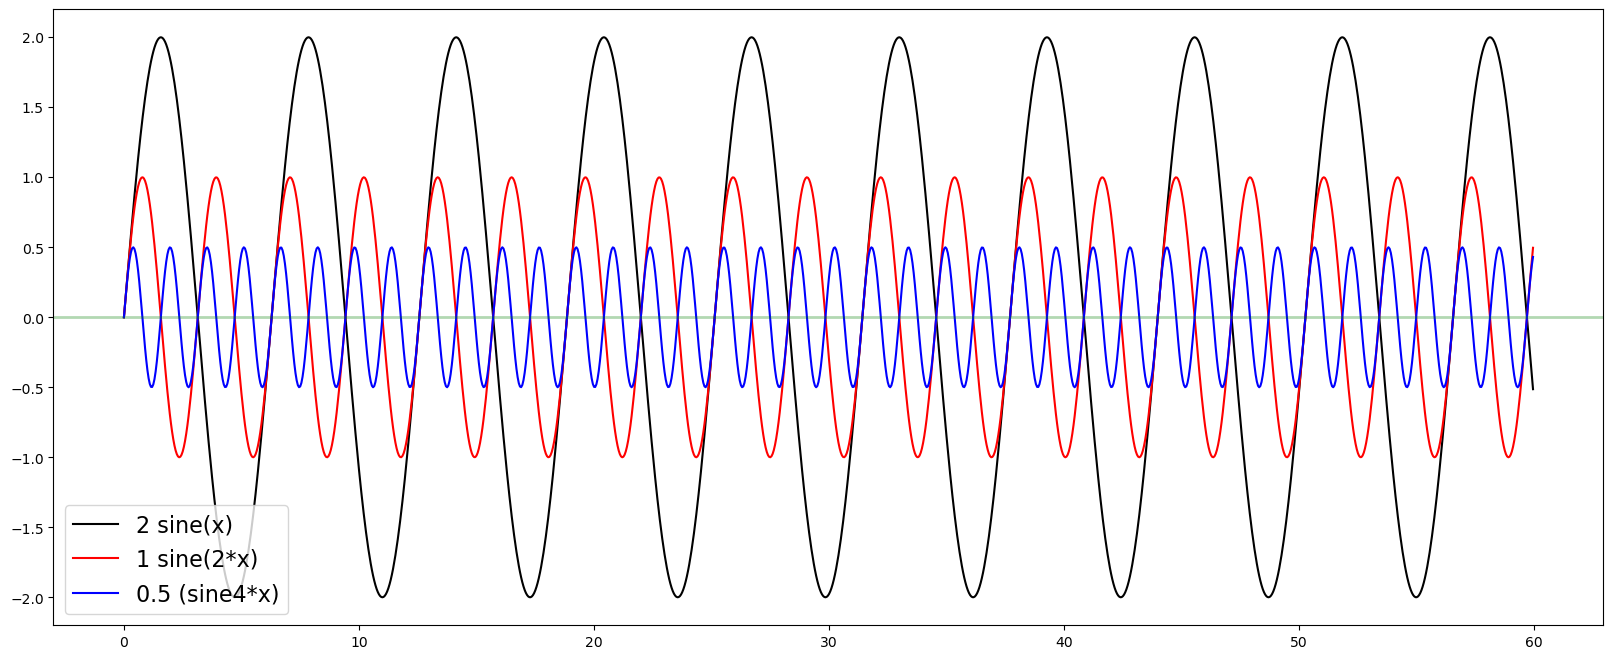

In [55]:
plt.figure(figsize=(20, 8))

somePeriod = 1
freq = 2 * np.pi / 10

x = np.arange(0, 60, 0.05)

plt.plot(x, 2 * np.sin(x), 'k-', label='2 sine(x)')
plt.plot(x, 1 * np.sin(2 * x), 'r-', label='1 sine(2*x)')
plt.plot(x, 0.5 * np.sin(4 * x), 'b-', label='0.5 (sine4*x)')
plt.axhline(y=0, linewidth=2, color='g', alpha=.3)
plt.legend(fontsize=16);

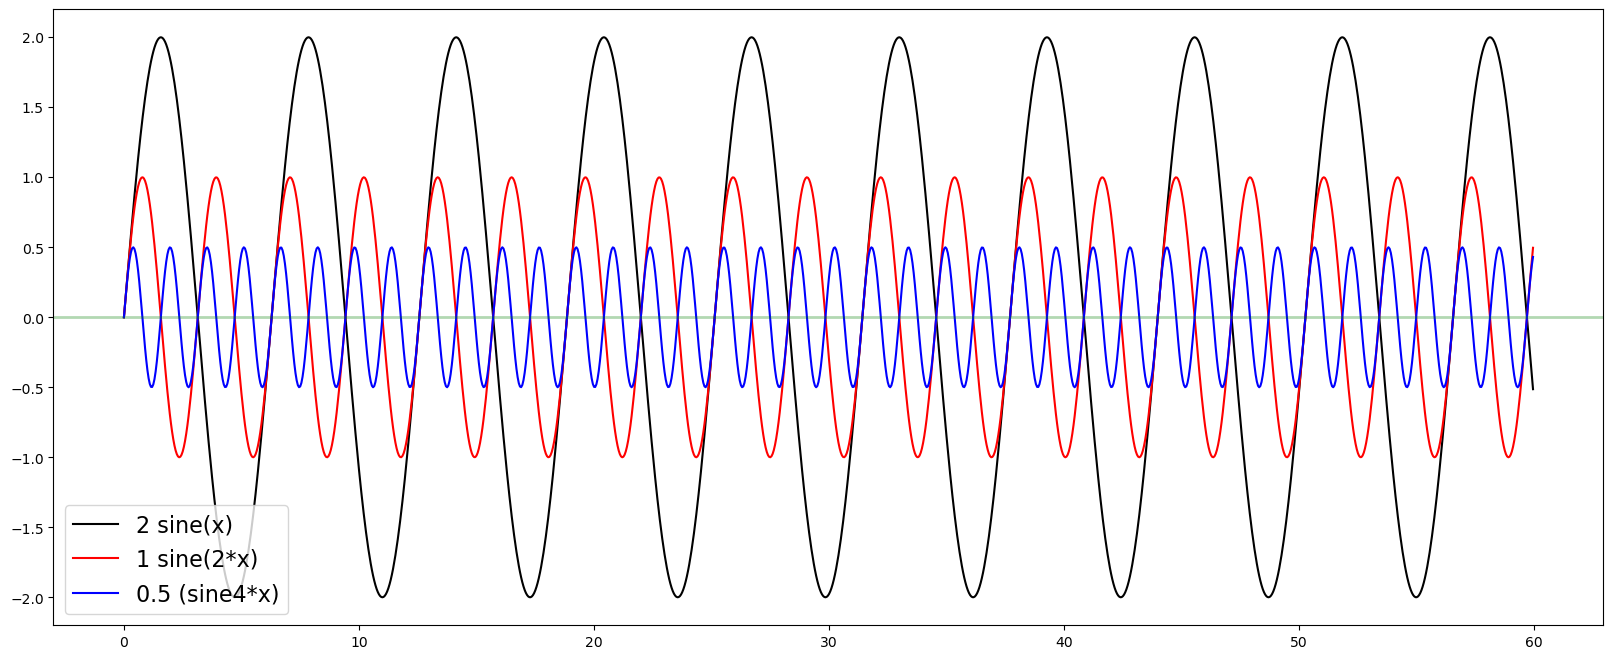

In [56]:
plt.figure(figsize=(20, 8))

x = np.arange(0, 60, 0.05)

plt.plot(x, 2 * np.sin(x), 'k-', label='2 sine(x)')
plt.plot(x, 1 * np.sin(2 * x), 'r-', label='1 sine(2*x)')
plt.plot(x, 0.5 * np.sin(4 * x), 'b-', label='0.5 (sine4*x)')
plt.axhline(y=0, linewidth=2, color='g', alpha=.3)
plt.legend(fontsize=16);

<center><img src="images/harmonics.png"/>
<center> Figure from Ranade and Xu, AN OVERVIEW OF HARMONICS MODELING AND SIMULATION
</center>

### Residual Seasonality -- Cont'd

- Therefore, to obtain the second harmonic, we can divide the period by 2 (period $\sim$ 1/frequency)

```python
seasonality = (3 * np.sin(2 * np.pi * x / 12)) + 
              (0.75 * np.sin(2 * np.pi * x / 6)) 
```

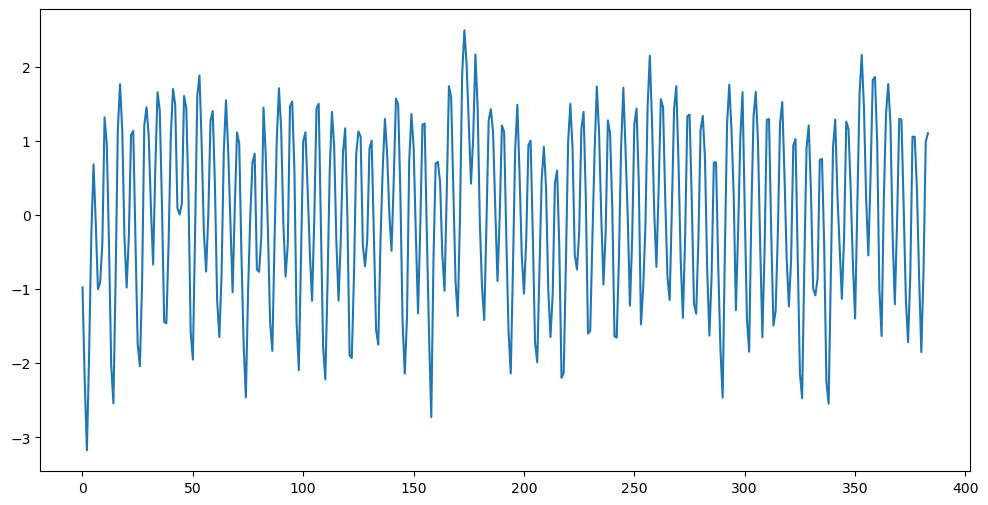

In [57]:
def fx(x):
    trend = func_powerlaw(x, *popt) 
    seasonality = (3 * np.sin(2 * np.pi * x / 12)) + (0.75 * np.sin(2 * np.pi * x / 6)) 
    return trend + seasonality


residuals = normalized_col['co2_val'] - fx(x_axis)

plt.figure(figsize=(12, 6))
plt.plot(residuals);

In [58]:
residuals = pd.DataFrame(residuals)
print(residuals.sum())
residuals.head()

0    11.326281
dtype: float64


,0
0,-0.977029
1,-2.233396
2,-3.173360
3,-1.870783
4,-0.266840


### Final Model

* Plotting the overall model
  * Power law trend
  * 12 month seasonality + one harmonic (6 months)

* We can observe that our model fits the data rather well


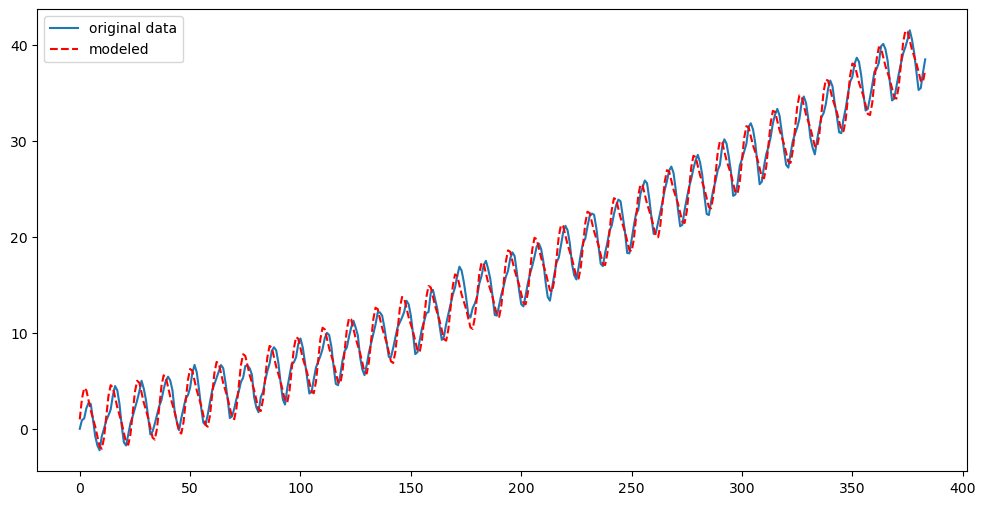

In [59]:
def fx(x):
    trend = func_powerlaw(x, *popt) 
    seasonality = (3 * np.sin(2 * np.pi * x / 12)) + (0.75 * np.sin(2 * np.pi * x / 6))
    return trend + seasonality


ax = plt.figure(figsize=(12, 6))

plt.plot(normalized_col['co2_val'], label="original data")
plt.plot(fx(x_axis), linestyle='--', color='r', label="modeled")
plt.legend();

### Predicting Future Data

* We predict 3 years (36 months) of $\mbox{CO}_2$ values


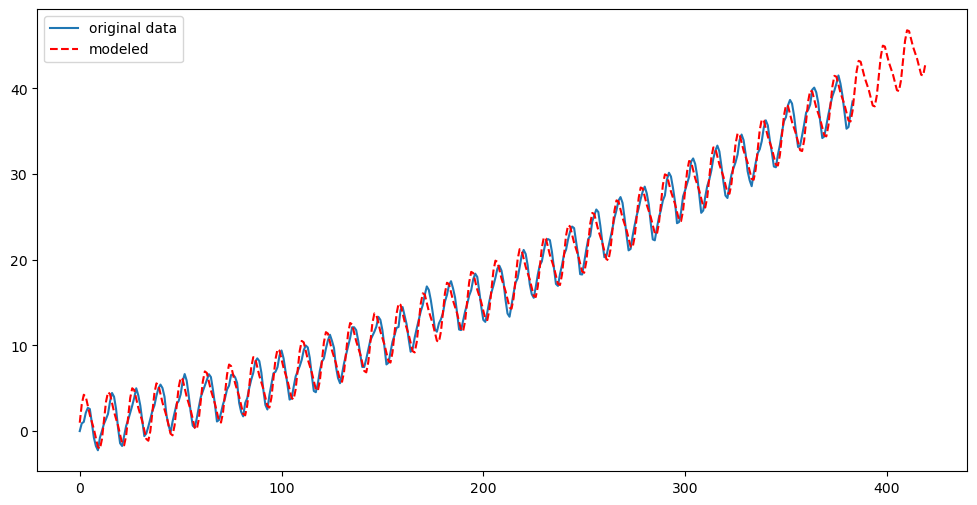

In [60]:
plt.figure(figsize=(12, 6))

x_axis = np.arange(0, len(normalized_col['co2_val']) + 36)

plt.plot(normalized_col['co2_val'], label="original data")
plt.plot(fx(x_axis), linestyle='--', color='r', label="modeled") 
plt.legend();

In [61]:
import warnings
warnings.simplefilter('ignore', UserWarning)

,y,t-12
y,1.000000,0.895635
t-12,0.895635,1.000000


,y,t-12
0,-0.977029,-0.379644
1,-2.233396,-2.020294
2,-3.173360,-2.540603
3,-1.870783,-0.876299
4,-0.266840,1.140833


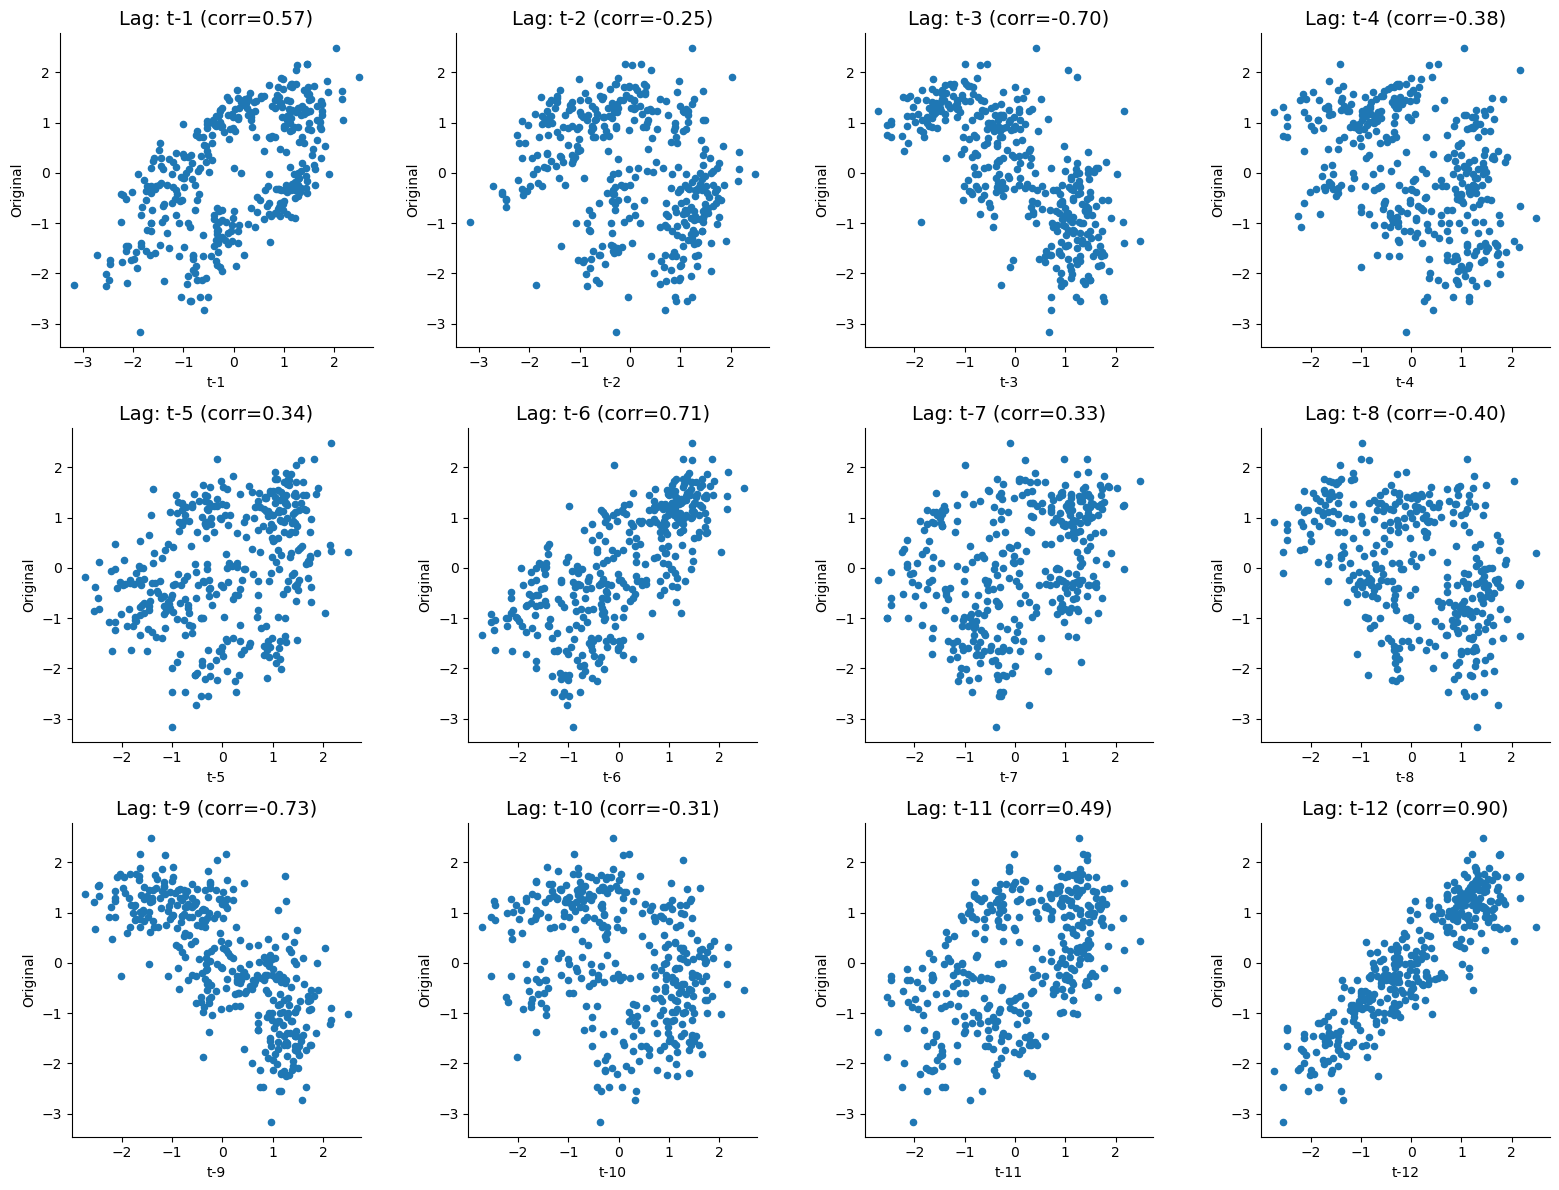

In [62]:
### Dicovering autocorrelation in the data
### How are the data correlated?

lags = 12
ncols = 4
nrows = int(np.ceil(lags/ncols))

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))
residuals.columns = ['co2_val']

for ax, lag in zip(axes.flat, np.arange(1, lags+1, 1)):
    lag_str = 't-{}'.format(lag)
    X = (pd.concat([residuals['co2_val'], residuals['co2_val'].shift(-lag)], axis=1,
                   keys=['y'] + [lag_str]).dropna())

    X.plot(ax=ax, kind='scatter', y='y', x=lag_str)
    corr = X.corr().values[0][1]
    ax.set_ylabel('Original')
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr), fontsize=14)
    ax.set_aspect('equal')
    sns.despine()

fig.tight_layout()

display(X.corr())
X.head()

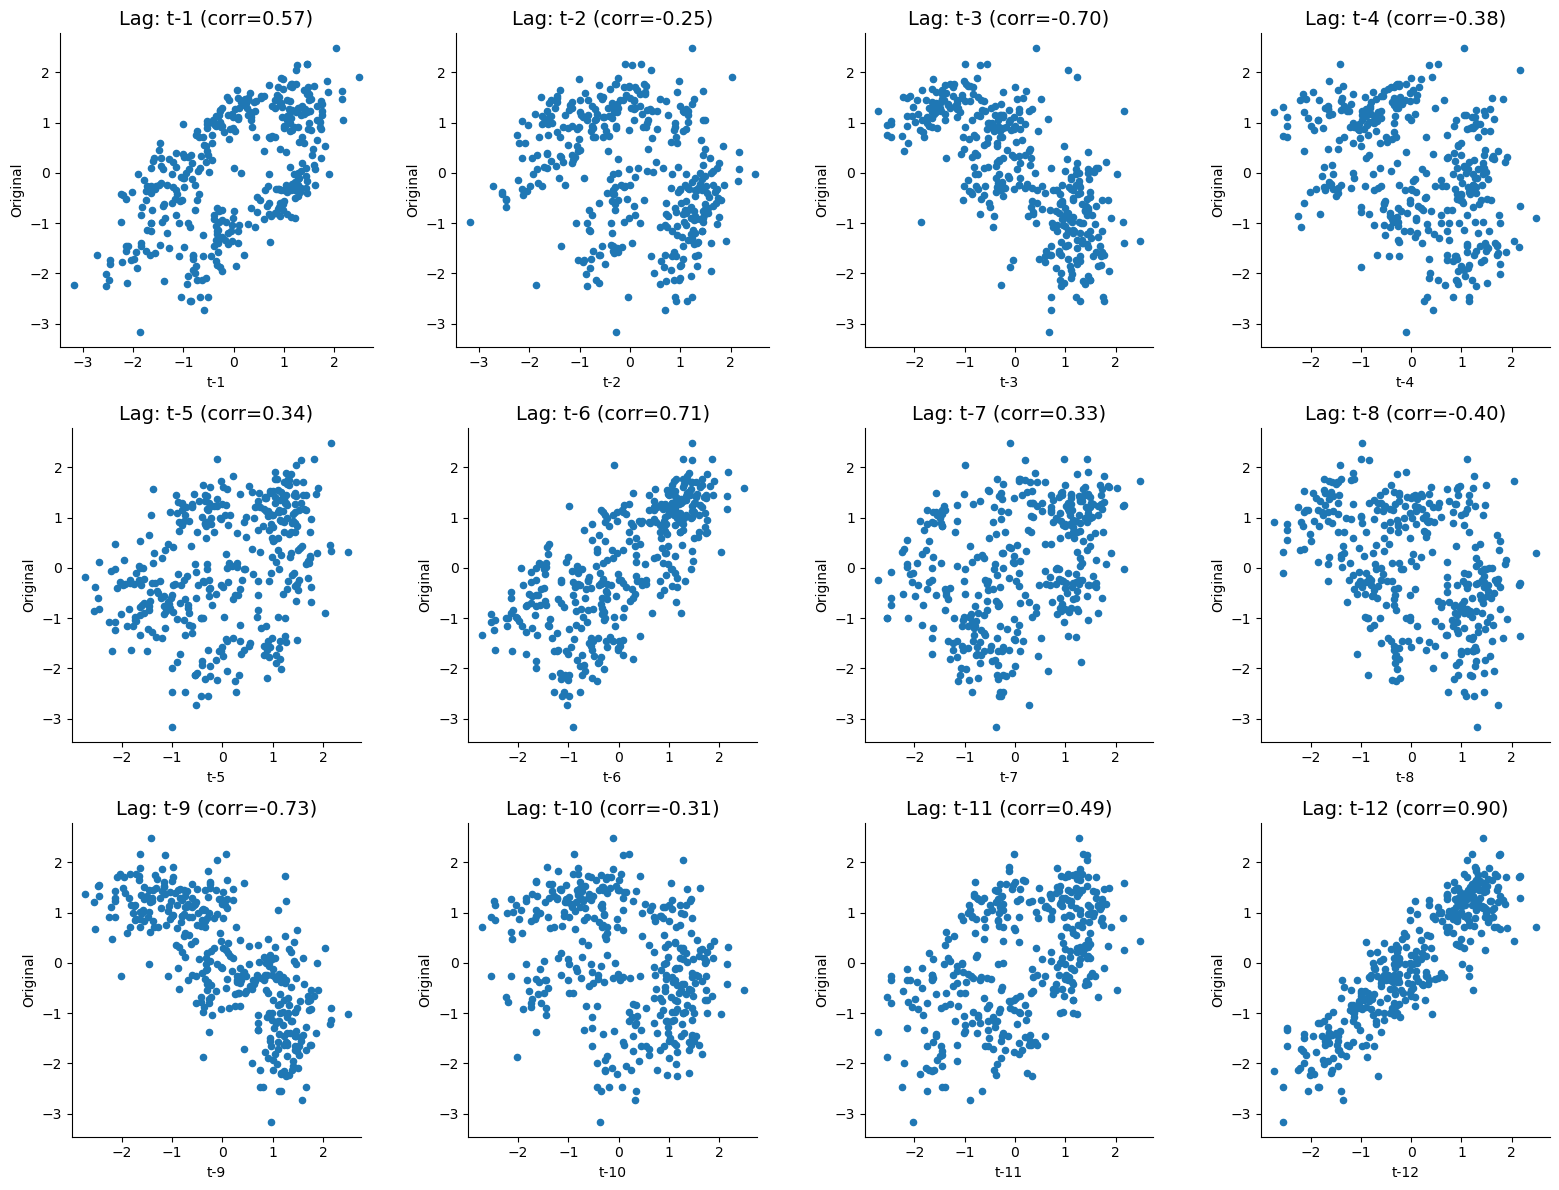

In [63]:
### Dicovering autocorrelation in the data
### How are the data correlated?

lags = 12
ncols = 4
nrows = int(np.ceil(lags/ncols))

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))
residuals.columns = ['co2_val']

for ax, lag in zip(axes.flat, np.arange(1, lags+1, 1)):
    lag_str = 't-{}'.format(lag)
    X = (pd.concat([residuals['co2_val'], residuals['co2_val'].shift(-lag)], axis=1,
                   keys=['y'] + [lag_str]).dropna())

    X.plot(ax=ax, kind='scatter', y='y', x=lag_str)
    corr = X.corr().values[0][1]
    ax.set_ylabel('Original')
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr), fontsize=14)
    ax.set_aspect('equal')
    sns.despine()

fig.tight_layout()